In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-mar-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-mar-2022/train.csv
/kaggle/input/tabular-playground-series-mar-2022/test.csv


In [96]:
# input modules
import matplotlib.pyplot as plt
import seaborn as sns
from math import sin, cos, pi
from sklearn.ensemble import RandomForestRegressor

In [69]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2022/train.csv', parse_dates=['time'])
test = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2022/test.csv', parse_dates=['time'])

## Data exploring

In [70]:
print('The dimension of train set: {}'.format(train.shape))
print('The dimension of test set: {}'.format(test.shape))

The dimension of train set: (848835, 6)
The dimension of test set: (2340, 5)


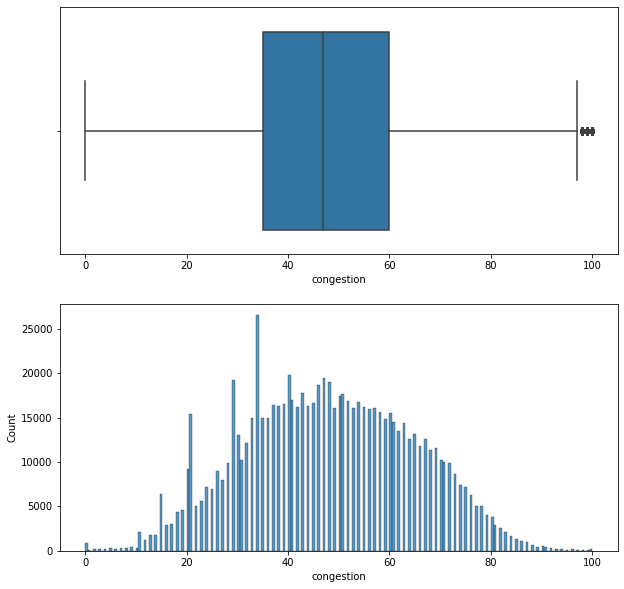

In [71]:
fig, axes = plt.subplots(2,1,figsize=(10,10))
sns.boxplot(x=train['congestion'], ax=axes[0])
sns.histplot(x=train['congestion'], ax=axes[1])
plt.show()


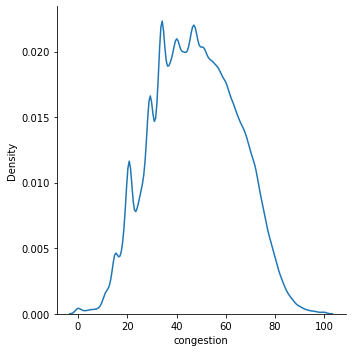

In [72]:
sns.displot(x=train['congestion'], kind='kde')
plt.show()

In [73]:
train['congestion'].describe()

count    848835.000000
mean         47.815305
std          16.799392
min           0.000000
25%          35.000000
50%          47.000000
75%          60.000000
max         100.000000
Name: congestion, dtype: float64

In [74]:
train.isnull().sum()

row_id        0
time          0
x             0
y             0
direction     0
congestion    0
dtype: int64

In [75]:
test.isnull().sum()

row_id       0
time         0
x            0
y            0
direction    0
dtype: int64

In [76]:
train.dtypes

row_id                 int64
time          datetime64[ns]
x                      int64
y                      int64
direction             object
congestion             int64
dtype: object

## Feature engineering

### Time based features

In [79]:
train['month'] = train['time'].dt.month
train['weekday'] = train['time'].dt.weekday
train['hour'] = train['time'].dt.hour
train['minute'] = train['time'].dt.minute

In [80]:
test['month'] = test['time'].dt.month
test['weekday'] = test['time'].dt.weekday
test['hour'] = test['time'].dt.hour
test['minute'] = test['time'].dt.minute

### Cyclical features

In [81]:
sin_vals = {'NB': 0.0, 'NE': sin(1 * pi/4), 'EB': 1.0, 'SE': sin(3 * pi/4), 'SB': 0.0, 'SW': sin(5 * pi/4), 'WB': -1.0, 'NW': sin(7 * pi/4)}
cos_vals = {'NB': 1.0, 'NE': cos(1 * pi/4), 'EB': 0.0, 'SE': cos(3 * pi/4), 'SB': -1.0, 'SW': cos(5 * pi/4), 'WB': 0.0, 'NW': cos(7 * pi/4)}

In [82]:
train['sin'] = train['direction'].map(sin_vals)
train['cos'] = train['direction'].map(cos_vals)

In [83]:
test['sin'] = test['direction'].map(sin_vals)
test['cos'] = test['direction'].map(cos_vals)

In [84]:
encoded_direction = {'NB': 0, 'NE': 1, 'EB': 2, 'SE': 3, 'SB': 4, 'SW': 5, 'WB': 6, 'NW': 7}
train['direction'] = train['direction'].map(encoded_direction)
test['direction'] = test['direction'].map(encoded_direction)


In [100]:
train.drop(columns=['row_id', 'time'], inplace=True)

In [101]:
X=train.drop(columns='congestion')
y=train['congestion']

In [102]:
rf = RandomForestRegressor(n_estimators=500, max_depth=5, n_jobs=-1)

In [103]:
rf.fit(X, y)

RandomForestRegressor(max_depth=5, n_estimators=500, n_jobs=-1)

In [105]:
stop

NameError: name 'stop' is not defined

In [ ]:
stop

### Rolling window features

In [ ]:
train['rolling_mean'] = train['congestion'].rolling(window=10, min_periods=1).mean()
train['rolling_max'] = train['congestion'].rolling(window=10, min_periods=1).max()
train['rolling_min'] = train['congestion'].rolling(window=10, min_periods=1).min()
train['rolling_std'] = train['congestion'].rolling(window=10, min_periods=1).std()

### Lag features

In [ ]:
train['lag_1'] = train['congestion'].shift(1)
train['lag_2'] = train['congestion'].shift(2)
train['lag_3'] = train['congestion'].shift(3)
train['lag_4'] = train['congestion'].shift(4)
train['lag_5'] = train['congestion'].shift(5)
train['lag_6'] = train['congestion'].shift(6)
train['lag_7'] = train['congestion'].shift(7)

In [ ]:
train.head(20)

### Expanding window feature

In [ ]:
train['congestion'].expanding(2).mean()

In [ ]:
train.head()

In [ ]:
sns.displot(rolling_max, kind='kde')
plt.show()

In [ ]:
sns.displot(rolling_min, kind='kde')
plt.show()

In [ ]:
sns.displot(rolling_std, kind='kde')
plt.show()

In [ ]:
sns.displot(rolling_mean, kind='kde')
plt.show()

In [ ]:
train.head()

In [ ]:
train.tail(20)

In [ ]:
test.head()